Section – Implementing Naive Bayes on a Dataset
In this notebook we will implement Naive Bayes step by step on:

A numeric dataset (Breast Cancer Wisconsin) using GaussianNB.
A text dataset (small example + 20 Newsgroups subset) using MultinomialNB.
The goal is to make the process easy to follow:

Load and understand the data
Train Naive Bayes models
Evaluate with accuracy, confusion matrix, and classification report
Connect each step with the theory from the slides and whiteboard notes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (7, 4)

In [6]:
data = load_breast_cancer()
x = data.data
y= data.target

print('x shape: ',x.shape)
print('y shape: ',y.shape)
print('target names: ',data.target_names)
print('5 features \n: ', data.feature_names[:5])

x shape:  (569, 30)
y shape:  (569,)
target names:  ['malignant' 'benign']
5 features 
:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness']


In [13]:
df = pd.DataFrame(x , columns=data.feature_names)
df['target']=y
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


target
1    357
0    212
Name: count, dtype: int64


Text(0, 0.5, 'Count')

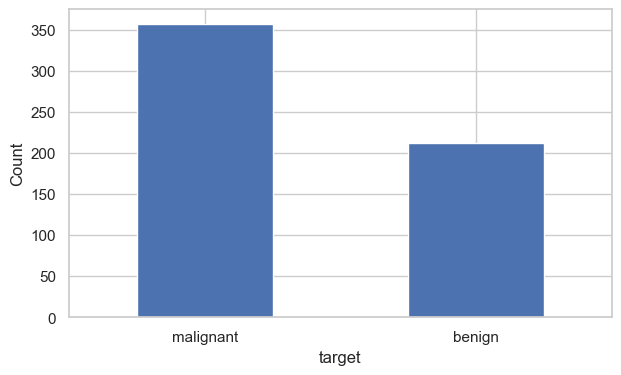

In [23]:
class_count = df['target'].value_counts()
print(class_count)

plt.figure()
class_count.plot(kind='bar')
plt.xticks(ticks=[0,1] , labels = data.target_names , rotation = 0)
plt.ylabel('Count')

Text(0, 0.5, 'Count')

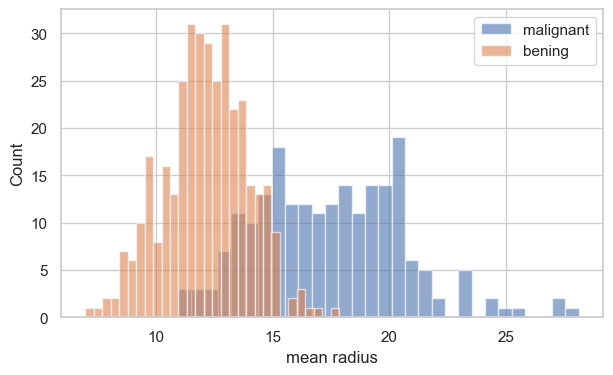

In [34]:
feature_name = 'mean radius'
feat_idx =  list(data.feature_names).index(feature_name)

plt.figure()
# alpha defines the transperency
plt.hist(x[y==0][:, feat_idx], bins=30 ,alpha=0.6, label='malignant')
plt.hist(x[y==1][:, feat_idx], bins=30 , alpha = 0.6 , label='bening')
plt.legend()
plt.xlabel(feature_name)
plt.ylabel('Count')

In [35]:
x_train , x_test , y_train,y_test = train_test_split(
    x,y, test_size=0.25 , random_state=42 , stratify=y)

# Train gaussian Naive Bayes

In [37]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [40]:
y_pred = gnb.predict(x_test)
acc = accuracy_score(y_test , y_pred)
acc

0.9370629370629371

Confusion matrix 
: [[46  7]
 [ 2 88]]


Text(0.5, 1.0, 'GaussianNB - Confusion Matrix')

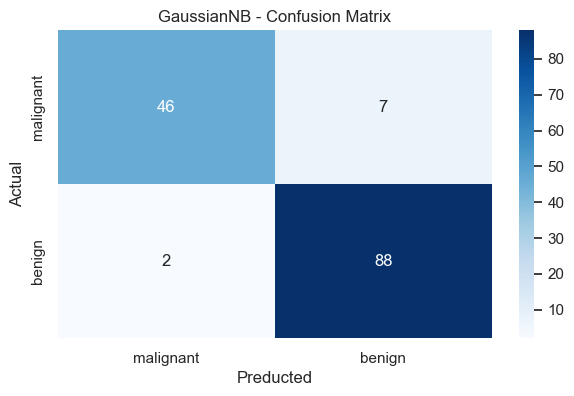

In [49]:
# confusion matrix

cm = confusion_matrix(y_test , y_pred)
print('Confusion matrix \n:',cm)

# annot is for the values inside each colours
# fmt -> format , d-> decimal
sns.heatmap(cm, annot=True, fmt='d' , cmap='Blues' , 
           xticklabels = data.target_names,
           yticklabels = data.target_names)
plt.xlabel('Preducted')
plt.ylabel('Actual')
plt.title('GaussianNB - Confusion Matrix')

In [54]:
# classification report

print(classification_report(y_test , y_pred , target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.96      0.87      0.91        53
      benign       0.93      0.98      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.92      0.93       143
weighted avg       0.94      0.94      0.94       143



# Multinominal Naive Bayes

In [72]:
texts = [
    'I love this product',
    'This is amazing and fantastic',
    'I really like this',
    'I hate this item',
    'This is the worst thing ever',
    'horrible and terrible experience',
]
labels = [1, 1, 1, 0, 0, 0]  # 1 = positive, 0 = negative

toy_df = pd.DataFrame({'text': texts, 'label': labels})
toy_df

,text,label
0,I love this product,1
1,This is amazing and fantastic,1
2,I really like this,1
3,I hate this item,0
4,This is the worst thing ever,0
5,horrible and terrible experience,0


In [73]:
# Convert text to features with Count Vectorizer
# text to number
vectorizer = CountVectorizer()
x_toy = vectorizer.fit_transform(toy_df['text'])
y_toy = toy_df['label']

print(x_toy.shape )  # (6,18)  6-> input lines   18 -> indevidual words
print('Vocabulary: ', vectorizer.get_feature_names_out())

(6, 18)
Vocabulary:  ['amazing' 'and' 'ever' 'experience' 'fantastic' 'hate' 'horrible' 'is'
 'item' 'like' 'love' 'product' 'really' 'terrible' 'the' 'thing' 'this'
 'worst']


In [74]:
multinomial_toy = MultinomialNB()
multinomial_toy.fit(x_toy, y_toy)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [75]:
y_toy_pred = multinomial_toy.predict(x_toy)
print('Accuracy on tiny dataset: ' , accuracy_score(y_toy , y_toy_pred))
print('Classification report: ',classification_report(y_toy , y_toy_pred ))

Accuracy on tiny dataset:  1.0
Classification report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



### Testing

In [76]:
new_texts = [
    'I love it',
    'This product is horrible',
    'Fantastic experience',
    'Worst purchase ever'
]

x_new = vectorizer.transform(new_texts)
new_pred = multinomial_toy.predict(x_new)

# zip -> marging text from different 2places
for txt, pred in zip(new_texts, new_pred):
    label_str = 'positive' if pred==1 else 'negative'
    print(f'{txt} -> {label_str}')

I love it -> positive
This product is horrible -> positive
Fantastic experience -> positive
Worst purchase ever -> negative
